<a href="https://colab.research.google.com/github/DiwashPaudel/DiwashPaudel/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning, Preparation, Wrangling, Join, Combine.**

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


df = pd.read_csv('sample_data/lab5 Automobile_data.csv')

 **Task 1**

**Ans A**. Pandas dataframe with first and last 10 rows.


In [6]:
print("First 10 rows:")
print(df.head(10))

print("\nLast 10 rows:")
print(df.tail(10))


First 10 rows:
   index      company   body-style wheel-base  length engine-type  \
0      0  alfa-romero  convertible       88.6   168.8        dohc   
1      1  alfa-romero         n.a.       88.6   168.8        dohc   
2      2  alfa-romero    hatchback       94.5   171.2        ohcv   
3      3         audi        sedan       99.8   176.6         ohc   
4      4         audi        sedan       99.4   176.6         ohc   
5      5         audi        sedan       99.8   177.3         ohc   
6      6         audi        wagon      105.8   192.7         ohc   
7      9          bmw        sedan      101.2   176.8         ohc   
8     10          bmw        sedan      101.2   176.8         ohc   
9     11          bmw        sedan      101.2   176.8         ohc   

  num-of-cylinders horsepower  average-mileage  price  
0             four        111               21  13495  
1             four        111               21  16500  
2              six        154               19  16500  
3

**Ans B.**Replacing all column values containing ‘?’, na or empty with NaN and updating ‘Automobile_data.csv’ file

In [7]:
df.replace(['?', 'na', ''], np.nan, inplace=True)
df.to_csv('sample_data/Automobile_data.csv', index=False)


**Ans C**. Find the company name of the most expensive car.

In [8]:
# Converting price into numeric (because it may contain '?')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
# Find the most expensive car
most_expensive_car = df.loc[df['price'].idxmax()]
print(f"The most expensive car is from: {most_expensive_car['company']}")

The most expensive car is from: mercedes-benz


**Ans D.** All bmw car details.

In [9]:
# Filter for BMW cars
bmw_cars = df[df['company'] == 'bmw']
print("BMW Car Details:")
print(bmw_cars)


BMW Car Details:
    index company body-style wheel-base  length engine-type num-of-cylinders  \
7       9     bmw      sedan      101.2   176.8         ohc             four   
8      10     bmw      sedan      101.2   176.8         ohc             four   
9      11     bmw      sedan      101.2   176.8         ohc              six   
10     13     bmw      sedan      103.5   189.0         ohc              six   
11     14     bmw      sedan      103.5   193.8         ohc              six   
12     15     bmw      sedan        110   197.0         ohc              six   

   horsepower  average-mileage    price  
7         101               23  16430.0  
8         101               23  16925.0  
9         121               21  20970.0  
10        182               16  30760.0  
11        182               16  41315.0  
12        182               15  36880.0  


**Ans E**. Total number of cars with car detail and highest price

In [10]:
# Group by company and find the total number of cars
car_count = df['company'].value_counts()

# Group by company and find the car with the highest price
highest_price_car = df.loc[df.groupby('company')['price'].idxmax()]

print("Total number of cars for each company:")
print(car_count)

print("\nCar with the highest price for each company:")
print(highest_price_car)


Total number of cars for each company:
company
toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
isuzu            3
jaguar           3
porsche          3
dodge            2
volvo            2
Name: count, dtype: int64

Car with the highest price for each company:
    index        company   body-style wheel-base  length engine-type  \
1       1    alfa-romero         n.a.       88.6   168.8        dohc   
6       6           audi        wagon      105.8   192.7         ohc   
11     14            bmw        sedan      103.5   193.8         ohc   
15     18      chevrolet        sedan       94.5   158.8         ohc   
16     19          dodge    hatchback       93.7   157.3         ohc   
19     28          honda        sedan       96.5   175.4         ohc   
21     30          isuzu        sedan       94.3   170.7         ohc   
2

**Ans F**. Average mileage.

In [11]:
# Convert mileage columns to numeric
df['average-mileage'] = pd.to_numeric(df['average-mileage'], errors='coerce')

# Group by company and calculate average mileage
average_mileage = df.groupby('company')['average-mileage'].mean()

print("Average mileage for each company:")
print(average_mileage)


Average mileage for each company:
company
alfa-romero      20.333333
audi             20.000000
bmw              19.000000
chevrolet        41.000000
dodge            31.000000
honda            26.333333
isuzu            33.333333
jaguar           14.333333
mazda            28.000000
mercedes-benz    18.000000
mitsubishi       29.500000
nissan           31.400000
porsche          17.000000
toyota           28.714286
volkswagen       31.750000
volvo            23.000000
Name: average-mileage, dtype: float64


**Ans G**. Sort all cars by price and horsepower.

In [12]:
# Convert horsepower to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Sort by price and then by horsepower
sorted_cars = df.sort_values(by=['price', 'horsepower'], ascending=[True, True])

print("Cars sorted by price and horsepower:")
print(sorted_cars)

Cars sorted by price and horsepower:
    index     company body-style wheel-base  length engine-type  \
13     16   chevrolet  hatchback       88.4   141.1        n.a.   
48     66      toyota  hatchback       95.7   158.7         ohc   
36     49  mitsubishi  hatchback       93.7   157.3         ohc   
28     37       mazda  hatchback        NaN   159.1         ohc   
37     50  mitsubishi  hatchback       93.7   157.3         ohc   
..    ...         ...        ...        ...     ...         ...   
27     36       mazda  hatchback       93.1   159.1         ohc   
22     31       isuzu      sedan       94.5   155.9         ohc   
23     32       isuzu      sedan       94.5   155.9         ohc   
47     63     porsche  hatchback       98.4   175.7       dohcv   
5       5        audi      sedan       99.8   177.3         ohc   

   num-of-cylinders  horsepower  average-mileage   price  
13            three        48.0               47  5151.0  
48             four        62.0         

**Task 2**

Creating Two DataFrame and Concatinating  them

In [13]:
# Creating the first DataFrame
data1 = {
    'rank': [1, 2, 3, 4],
    'team': ['England', 'India', 'NewZealand', 'SouthAfrica'],
    'rating': [126, 121, 112, 111]
}

df1 = pd.DataFrame(data1)

# Creating the second DataFrame
data2 = {
    'rank': [1, 2, 3, 4],
    'team': ['Australia', 'SriLanka', 'Pakistan', 'WestIndies'],
    'rating': [102, 100, 93, 79]
}

df2 = pd.DataFrame(data2)

# Concatenating the two DataFrames
df_concat = pd.concat([df1, df2], ignore_index=True)

# Display the concatenated DataFrame
print("Concatenated DataFrame:")
print(df_concat)


Concatenated DataFrame:
   rank         team  rating
0     1      England     126
1     2        India     121
2     3   NewZealand     112
3     4  SouthAfrica     111
4     1    Australia     102
5     2     SriLanka     100
6     3     Pakistan      93
7     4   WestIndies      79


**Task 3**

**Ans A.**

**Inner Join:** An inner join only returns rows (or DataFrames) that match in both tables. Rows that do not match are removed from the results.Example for inner join

In [14]:
# DataFrame 1: Employees
df1 = pd.DataFrame({
    'EmployeeID': [1, 2, 3, 4],
    'EmployeeName': ['John', 'Jane', 'Doe', 'Smith']
})

# DataFrame 2: Departments
df2 = pd.DataFrame({
    'EmployeeID': [2, 3, 5],
    'Department': ['HR', 'IT', 'Finance']
})

# Inner Join on 'EmployeeID'
inner_join = pd.merge(df1, df2, on='EmployeeID', how='inner')

print("Inner Join:")
print(inner_join)


Inner Join:
   EmployeeID EmployeeName Department
0           2         Jane         HR
1           3          Doe         IT


**Outer Join:** An outer join (a full outer join) returns all rows from both tables, with matching rows from both sides where available. If there is no match, NaN (null values) will be inserted to find missing matches.Example for Outer join

In [15]:
# Outer Join on 'EmployeeID'
outer_join = pd.merge(df1, df2, on='EmployeeID', how='outer')

print("Outer Join:")
print(outer_join)


Outer Join:
   EmployeeID EmployeeName Department
0           1         John        NaN
1           2         Jane         HR
2           3          Doe         IT
3           4        Smith        NaN
4           5          NaN    Finance


**Left Join:** A left join returns all the rows from the left table (the first DataFrame) and the matched rows from the right table (the second DataFrame). If there is no match, NaN is used for missing values on the right table.Example for left join

In [16]:
# Left Join on 'EmployeeID'
left_join = pd.merge(df1, df2, on='EmployeeID', how='left')

print("Left Join:")
print(left_join)


Left Join:
   EmployeeID EmployeeName Department
0           1         John        NaN
1           2         Jane         HR
2           3          Doe         IT
3           4        Smith        NaN


**Right Join:**A right join returns all rows from the right table (the second DataFrame) and the matched rows from the left table (the first DataFrame). If there is no match, NaN is used for missing values on the left table.Example of Right Join


In [ ]:
# Right Join on 'EmployeeID'
right_join = pd.merge(df1, df2, on='EmployeeID', how='right')

print("Right Join:")
print(right_join)


Right Join:
   EmployeeID EmployeeName Department
0           2         Jane         HR
1           3          Doe         IT
2           5          NaN    Finance


**Ans B** Image of Different Joins


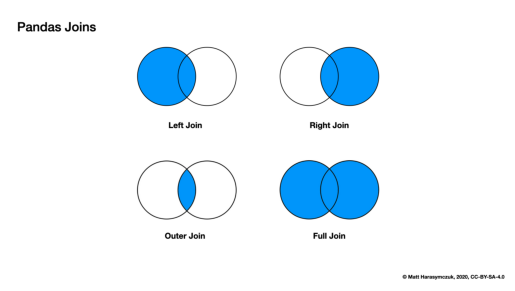

In [3]:
image_path = 'sample_data/join.png'

# Load the image
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

**Ans C** Two different data frames With outer, right, left and inner joins between them

In [ ]:
# Creating the two dataframes
df1 = pd.DataFrame({
    'rank': [1, 2, 3, 4, 5, 6, 7, 8],
    'team': ['England', 'India', 'NewZealand', 'SouthAfrica', 'Pakistan', 'Australia', 'Bangladesh', 'SriLanka'],
    'rating': [126, 121, 112, 111, 102, 100, 93, 79]
})

df2 = pd.DataFrame({
    'rank': [1, 2, 3, 4, 5, 6, 7, 8],
    'team': ['India', 'England', 'SouthAfrica', 'NewZealand', 'Australia', 'SriLanka', 'Pakistan', 'WestIndies'],
    'rating': [126, 121, 112, 111, 102, 100, 93, 79]
})

# 1. Inner Join: Returns only the rows where there is a match in both dataframes
inner_join = pd.merge(df1, df2, on="team", how="inner", suffixes=('_df1', '_df2'))
print("Inner Join:\n", inner_join)

# 2. Outer Join: Returns all rows when there is a match in either dataframe
outer_join = pd.merge(df1, df2, on="team", how="outer", suffixes=('_df1', '_df2'))
print("\nOuter Join:\n", outer_join)

# 3. Left Join: Returns all rows from the left dataframe, with matching rows from the right dataframe
left_join = pd.merge(df1, df2, on="team", how="left", suffixes=('_df1', '_df2'))
print("\nLeft Join:\n", left_join)

# 4. Right Join: Returns all rows from the right dataframe, with matching rows from the left dataframe
right_join = pd.merge(df1, df2, on="team", how="right", suffixes=('_df1', '_df2'))
print("\nRight Join:\n", right_join)


Inner Join:
    rank_df1         team  rating_df1  rank_df2  rating_df2
0         1      England         126         2         121
1         2        India         121         1         126
2         3   NewZealand         112         4         111
3         4  SouthAfrica         111         3         112
4         5     Pakistan         102         7          93
5         6    Australia         100         5         102
6         8     SriLanka          79         6         100

Outer Join:
    rank_df1         team  rating_df1  rank_df2  rating_df2
0       6.0    Australia       100.0       5.0       102.0
1       7.0   Bangladesh        93.0       NaN         NaN
2       1.0      England       126.0       2.0       121.0
3       2.0        India       121.0       1.0       126.0
4       3.0   NewZealand       112.0       4.0       111.0
5       5.0     Pakistan       102.0       7.0        93.0
6       4.0  SouthAfrica       111.0       3.0       112.0
7       8.0     SriLanka     

Explanation:All rows from the right dataframe (df2) are returned via the right join along with corresponding rows from the left dataframe (df1). When no match is discovered (such as in the West Indies), NaN is applied to the df1 missing data.